### San Francisco Housing Cost Analysis

In [91]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [92]:
#Read Mapbox API
load_dotenv()
map_box_api = os.getenv("MAPBOX_TOKEN")

#### Load Data

In [32]:
#Load CSV and set year
sf_data = pd.read_csv("sfo_neighborhoods_census_data.csv", index_col="year")
sf_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


#### Housing Units Per Year

Mean/Max/Min/STD

In [33]:
#Caculate the mean number of housing units per year 

housing_units_per_year = sf_data['housing_units'].groupby(by = ('year')).mean()
housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [29]:
housing_units_max = housing_units_per_year.max()
housing_units_max

384242

In [28]:
housing_units_min = housing_units_per_year.min()
housing_units_min

372560

In [30]:
housing_units_std = housing_units_per_year.std()
housing_units_std

4206.0007132667015

In [31]:
housing_units_per_year.to_csv(r'C:\Users\David R\Downloads\housing_units_per_year.csv', index=False)

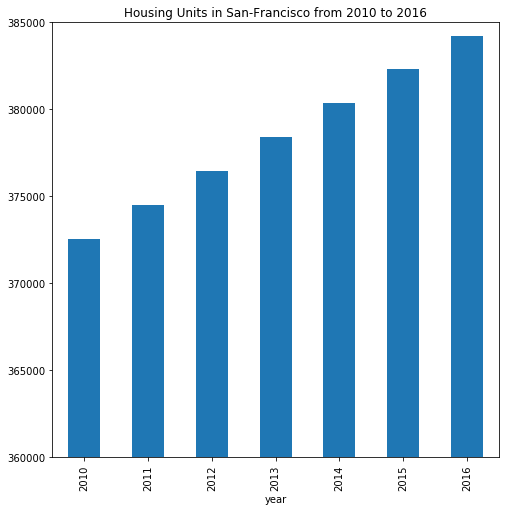

In [25]:
# Use the Pandas plot function to plot the average housing units per year.
housing_units_per_year.plot.bar(figsize=(8,8), x='Year', y='Housing Units',title='Housing Units in San-Francisco from 2010 to 2016')
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!
plt.ylim((360000, 385000))
plt.show()
plt.close()

In [36]:
# Calculate the average sale price per square foot and average gross rent
sf_avg_price_rent_df = sf_data[['sale_price_sqr_foot','gross_rent']].groupby(['year'])['sale_price_sqr_foot','gross_rent'].mean()
sf_avg_price_rent_df

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [ ]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
#reset index to make the year as x 

#### Average Rent Per Year

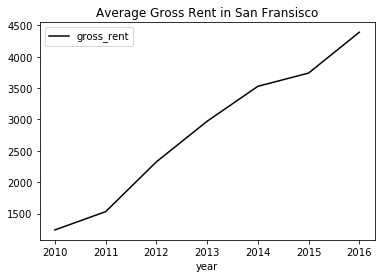

In [43]:
sf_data[['gross_rent']].groupby(by='year').mean().plot(kind = 'line', title = "Average Gross Rent in San Fransisco", color= 'black')
#Different ways to do a graph. Line is Black because of SF Giants. 

#### Average Price per Sqft per Year

Text(0, 0.5, 'Price per SqFt')

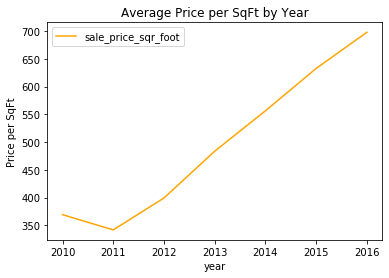

In [42]:
price_plot = sf_avg_price_rent_df.reset_index().plot(x='year',  y='sale_price_sqr_foot',  title='Average Price per SqFt by Year', color='orange')
price_plot.set_ylabel("Price per SqFt")
#Different ways to do a graph. Line is Orange because of SF Giants. 

### Average Prices by Neighborhood
Group by year and neighborhood and then create a new dataframe of the mean values

In [45]:
sf_df = sfo_data.groupby(by = ['year','neighborhood']).mean().reset_index()
sf_df.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [46]:
# Use hvplot to create an interactive line chart of the average monthly rent.
sf_df.hvplot.line(x = 'year', y = ['sale_price_sqr_foot'],groupby = 'neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [48]:
# Use hvplot to create an interactive line chart of the average monthly rent.
sf_df.hvplot.line(x = 'year', y = ['gross_rent'],groupby = 'neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

### Top Ten Most Expensive Neighborhoods


In [49]:
Expensive = sf_data.groupby(by= 'neighborhood').mean().sort_values(by = 'sale_price_sqr_foot', ascending = False, ).reset_index().iloc[:10,:]
Expensive

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [57]:
# Plotting the data from the top 10 expensive neighborhoods
Expensive.hvplot.bar(x = 'neighborhood', y = 'sale_price_sqr_foot', rot = 90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [59]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sf_df.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


#### Plotting the data from the top 10 expensive neighborhoods

In [60]:
sf_df.hvplot.bar(x = 'neighborhood', y = 'sale_price_sqr_foot', rot = 90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [63]:
sf_df.hvplot.bar(x = 'neighborhood', y = 'gross_rent', rot = 90)

:Bars   [neighborhood]   (gross_rent)

In [88]:
sf_df.hvplot.bar(x='year',  y=['sale_price_sqr_foot', 'gross_rent'], xlabel='Year',ylabel='Avg price, Gross rent', 
    groupby='neighborhood', rot=90)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

### Neighborhood Map

In [68]:
coordinates_df = pd.read_csv("neighborhoods_coordinates.csv")
coordinates_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


#### Data Preparation

In [69]:
# Calculate the mean values for each neighborhood
sf_neighborhood_avg = sf_data.groupby(by = 'neighborhood').mean().reset_index()
sf_neighborhood_avg

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.00,2817.285714
1,Anza Vista,373.382198,379050.00,3031.833333
2,Bayview,204.588623,376454.00,2318.400000
3,Bayview Heights,590.792839,382295.00,3739.000000
4,Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...,...
68,West Portal,498.488485,376940.75,2515.500000
69,Western Addition,307.562201,377427.50,2555.166667
70,Westwood Highlands,533.703935,376454.00,2250.500000
71,Westwood Park,687.087575,382295.00,3959.000000


In [71]:
# Join the average values with the neighborhood locations
combined_df = pd.concat( [coordinates_df,sf_neighborhood_avg],axis = 1, join = 'inner').drop(columns = 'neighborhood')
combined_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [93]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

In [94]:
map_plot = px.scatter_mapbox(
    combined_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name="Neighborhood",
    title="Average Sale Price Per SqFt & Gross Rent in San Francisco",
    zoom=11
)
map_plot.show()
#The map doesn't pop up for me specifically but I can see the stats when I scroll over it?

### Cost Analysis-Optional Challenge